In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/andrenedvidek/Desktop/Data Analaysis/CareerFoundry /Data Emersion /Task 6.1/02 Data/Prepared Data'

In [4]:
realtor_clean = pd.read_pickle(os.path.join(path, 'realtor-data_clean.pkl'))

In [5]:
realtor_clean.head(20)

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.0,NaN
7,for_sale,71600.0,3.0,2.0,0.08,1048466.0,Ponce,Puerto Rico,731.0,1050.0,NaN
8,for_sale,100000.0,2.0,1.0,0.09,734904.0,Ponce,Puerto Rico,730.0,1092.0,NaN
9,for_sale,300000.0,5.0,3.0,7.46,1946226.0,Las Marias,Puerto Rico,670.0,5403.0,NaN


In [7]:
realtor_clean.shape

(2223429, 11)

In [8]:
realtor_clean.isnull().sum()

status                 0
price                  0
bed               479849
bath              509973
acre_lot          325071
street             10769
city                   0
state                  0
zip_code             190
house_size        566843
prev_sold_date    732182
dtype: int64

In [9]:
# Create a copy of the subset
state_rec = realtor_clean.copy()

# Fill missing values in the copied DataFrame
state_rec['bed'].fillna(state_rec['bed'].median(), inplace=True)
state_rec['bath'].fillna(state_rec['bath'].median(), inplace=True)
state_rec['acre_lot'].fillna(state_rec['acre_lot'].median(), inplace=True)
state_rec['house_size'].fillna(state_rec['house_size'].median(), inplace=True)


In [10]:
dups = state_rec.duplicated()

In [12]:
dups.shape

(2223429,)

/var/folders/sb/vky803ms4yqcv95cvw9hmntr0000gn/T/ipykernel_18091/1546817236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(state_rec['price'], bins=25) # Shows extreme values
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

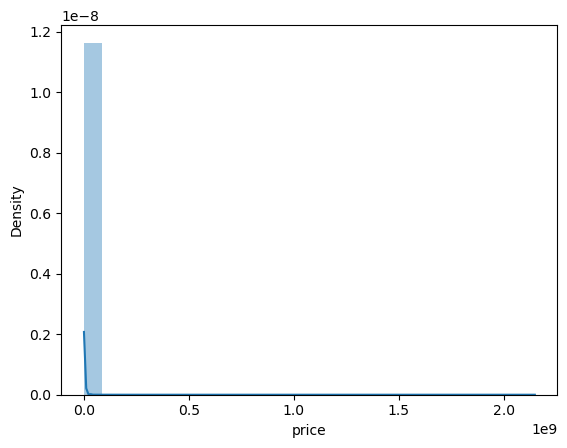

In [13]:
sns.distplot(state_rec['price'], bins=25) # Shows extreme values



In [16]:
state_rec['price'].max() # Check the max

2147483600.0

In [17]:
state_rec['price'].median() # Check the max

325000.0

In [18]:
state_rec['price'].mean() # Check the max

524191.4316329372

###  Data prep for regression analysis 

### Hypothesis: The larger the acre lot the higher the price of the property

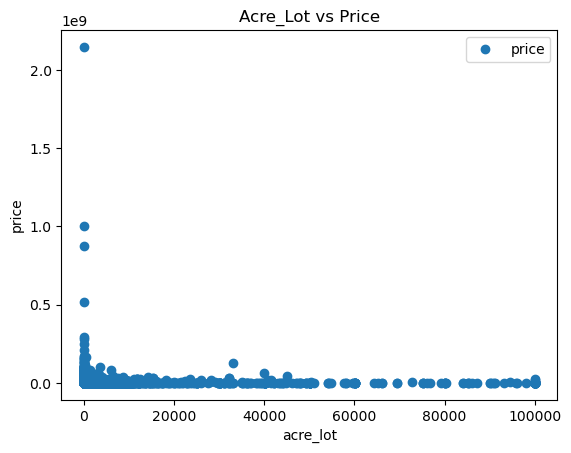

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

state_rec.plot(x = 'acre_lot', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Acre_Lot vs Price')  
plt.xlabel('acre_lot')  
plt.ylabel('price')  
plt.show()

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = state_rec['acre_lot'].values.reshape(-1,1)
y = state_rec['price'].values.reshape(-1,1)

In [25]:
X

array([[0.12],
       [0.08],
       [0.15],
       ...,
       [0.5 ],
       [0.09],
       [0.31]])

In [26]:
y

array([[105000.],
       [ 80000.],
       [ 67000.],
       ...,
       [440000.],
       [179900.],
       [580000.]])

In [27]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [29]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

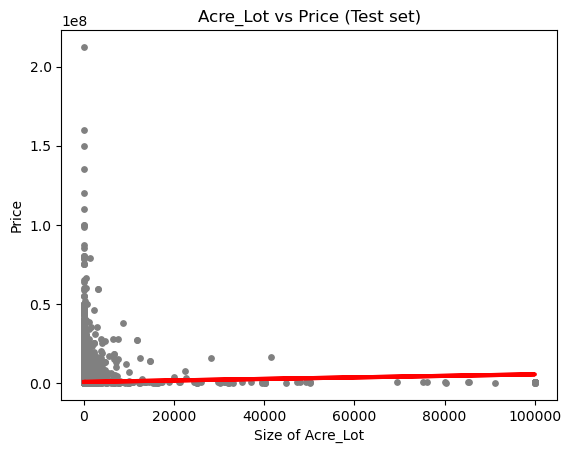

In [38]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Acre_Lot vs Price (Test set)')
plot_test.xlabel('Size of Acre_Lot')
plot_test.ylabel('Price')
plot_test.show()

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 


In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[48.10583441]]
Mean squared error:  1560169900031.9453
R2 score:  0.0002683329014864233


In [34]:
y_predicted

array([[524025.36052719],
       [524333.71892577],
       [524031.13322732],
       ...,
       [524023.91735216],
       [524038.83016083],
       [524031.13322732]])

In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,45400.0,524025.360527
1,509900.0,524333.718926
2,110000.0,524031.133227
3,249900.0,524031.614286
4,7000.0,524045.083919
5,259900.0,524020.549944
6,75000.0,524030.171111
7,775000.0,524043.159686
8,349900.0,524032.095344
9,2100000.0,524283.688858


##### Compare how the regression fits the training set

In [36]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[48.10583441]]
Mean squared error:  5866893815189.594
R2 score:  0.00020395422089103388


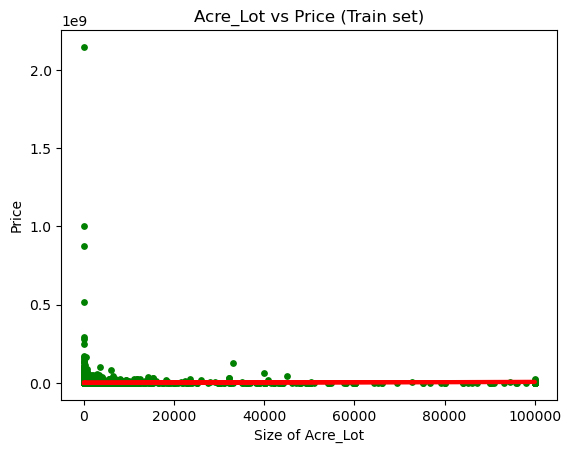

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Acre_Lot vs Price (Train set)')
plot_test.xlabel('Size of Acre_Lot')
plot_test.ylabel('Price')
plot_test.show()



In [45]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = state_rec[state_rec['price'] <=1000000] 

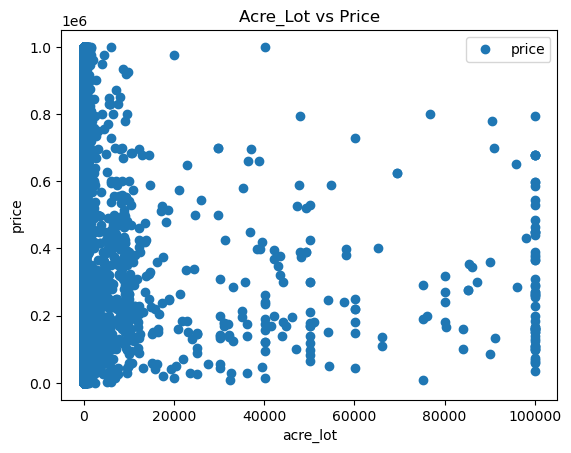

In [46]:
df_test.plot(x = 'acre_lot', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Acre_Lot vs Price')  
plt.xlabel('acre_lot')  
plt.ylabel('price')  
plt.show()

In [49]:
# Reshape again.

X_2 = df_test['acre_lot'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [50]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [51]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [52]:
y_predicted_2 = regression.predict(X_test_2)

In [53]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.31362942]]
Mean squared error:  54984725703.706184
R2 score:  -1.1492664660828211e-05


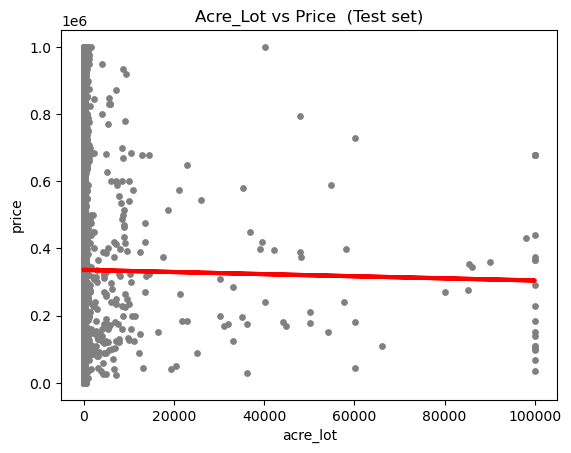

In [55]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Acre_Lot vs Price  (Test set)')
plot_test.xlabel('acre_lot')
plot_test.ylabel('price')
plot_test.show()

In [56]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,449000.0,335864.275991
1,859000.0,335866.389853
2,249900.0,335866.226766
3,779000.0,335866.289492
4,175000.0,335866.123268
5,189900.0,335866.342809
6,326020.0,335866.389853
7,450000.0,335866.352218
8,648000.0,335866.342809
9,29900.0,335866.371035


 

### After running two separate regressions one with out lies taken out of it, becomes clear that property size does not really play 
### a large role in determining the price of a house. I am beginning to believe they all play a small part, but the location is the most important
